# <span style="color: #45b6fe; font-weight: bold;">Análisis Primer DataSet - Diabetes</span>

In [152]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, recall_score
from sklearn.preprocessing import StandardScaler 

datasetDiabetes = pd.read_csv("./diabetes.csv")
datasetDiabetes

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

### Verificar valores nulos en el DataFrame

In [153]:
valores_nulos = datasetDiabetes.isnull().sum()
print(valores_nulos)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


### Stadisticas de los datos

In [154]:
from IPython.display import display

statistics = datasetDiabetes.describe()

print("Estadisticas de los valores:")
print(statistics)

Estadisticas de los valores:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min   

In [155]:
X = datasetDiabetes.drop(columns=['Outcome'])
y = datasetDiabetes['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
trainingDataSetDiabetesSinModificar, testingDataSetDiabetesSinModificar, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de datos: Escalar las características
scaler = StandardScaler()
X_train_scaledSinModificar = scaler.fit_transform(trainingDataSetDiabetesSinModificar)
X_test_scaledSinModificar = scaler.transform(testingDataSetDiabetesSinModificar)

c:\Users\kenny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


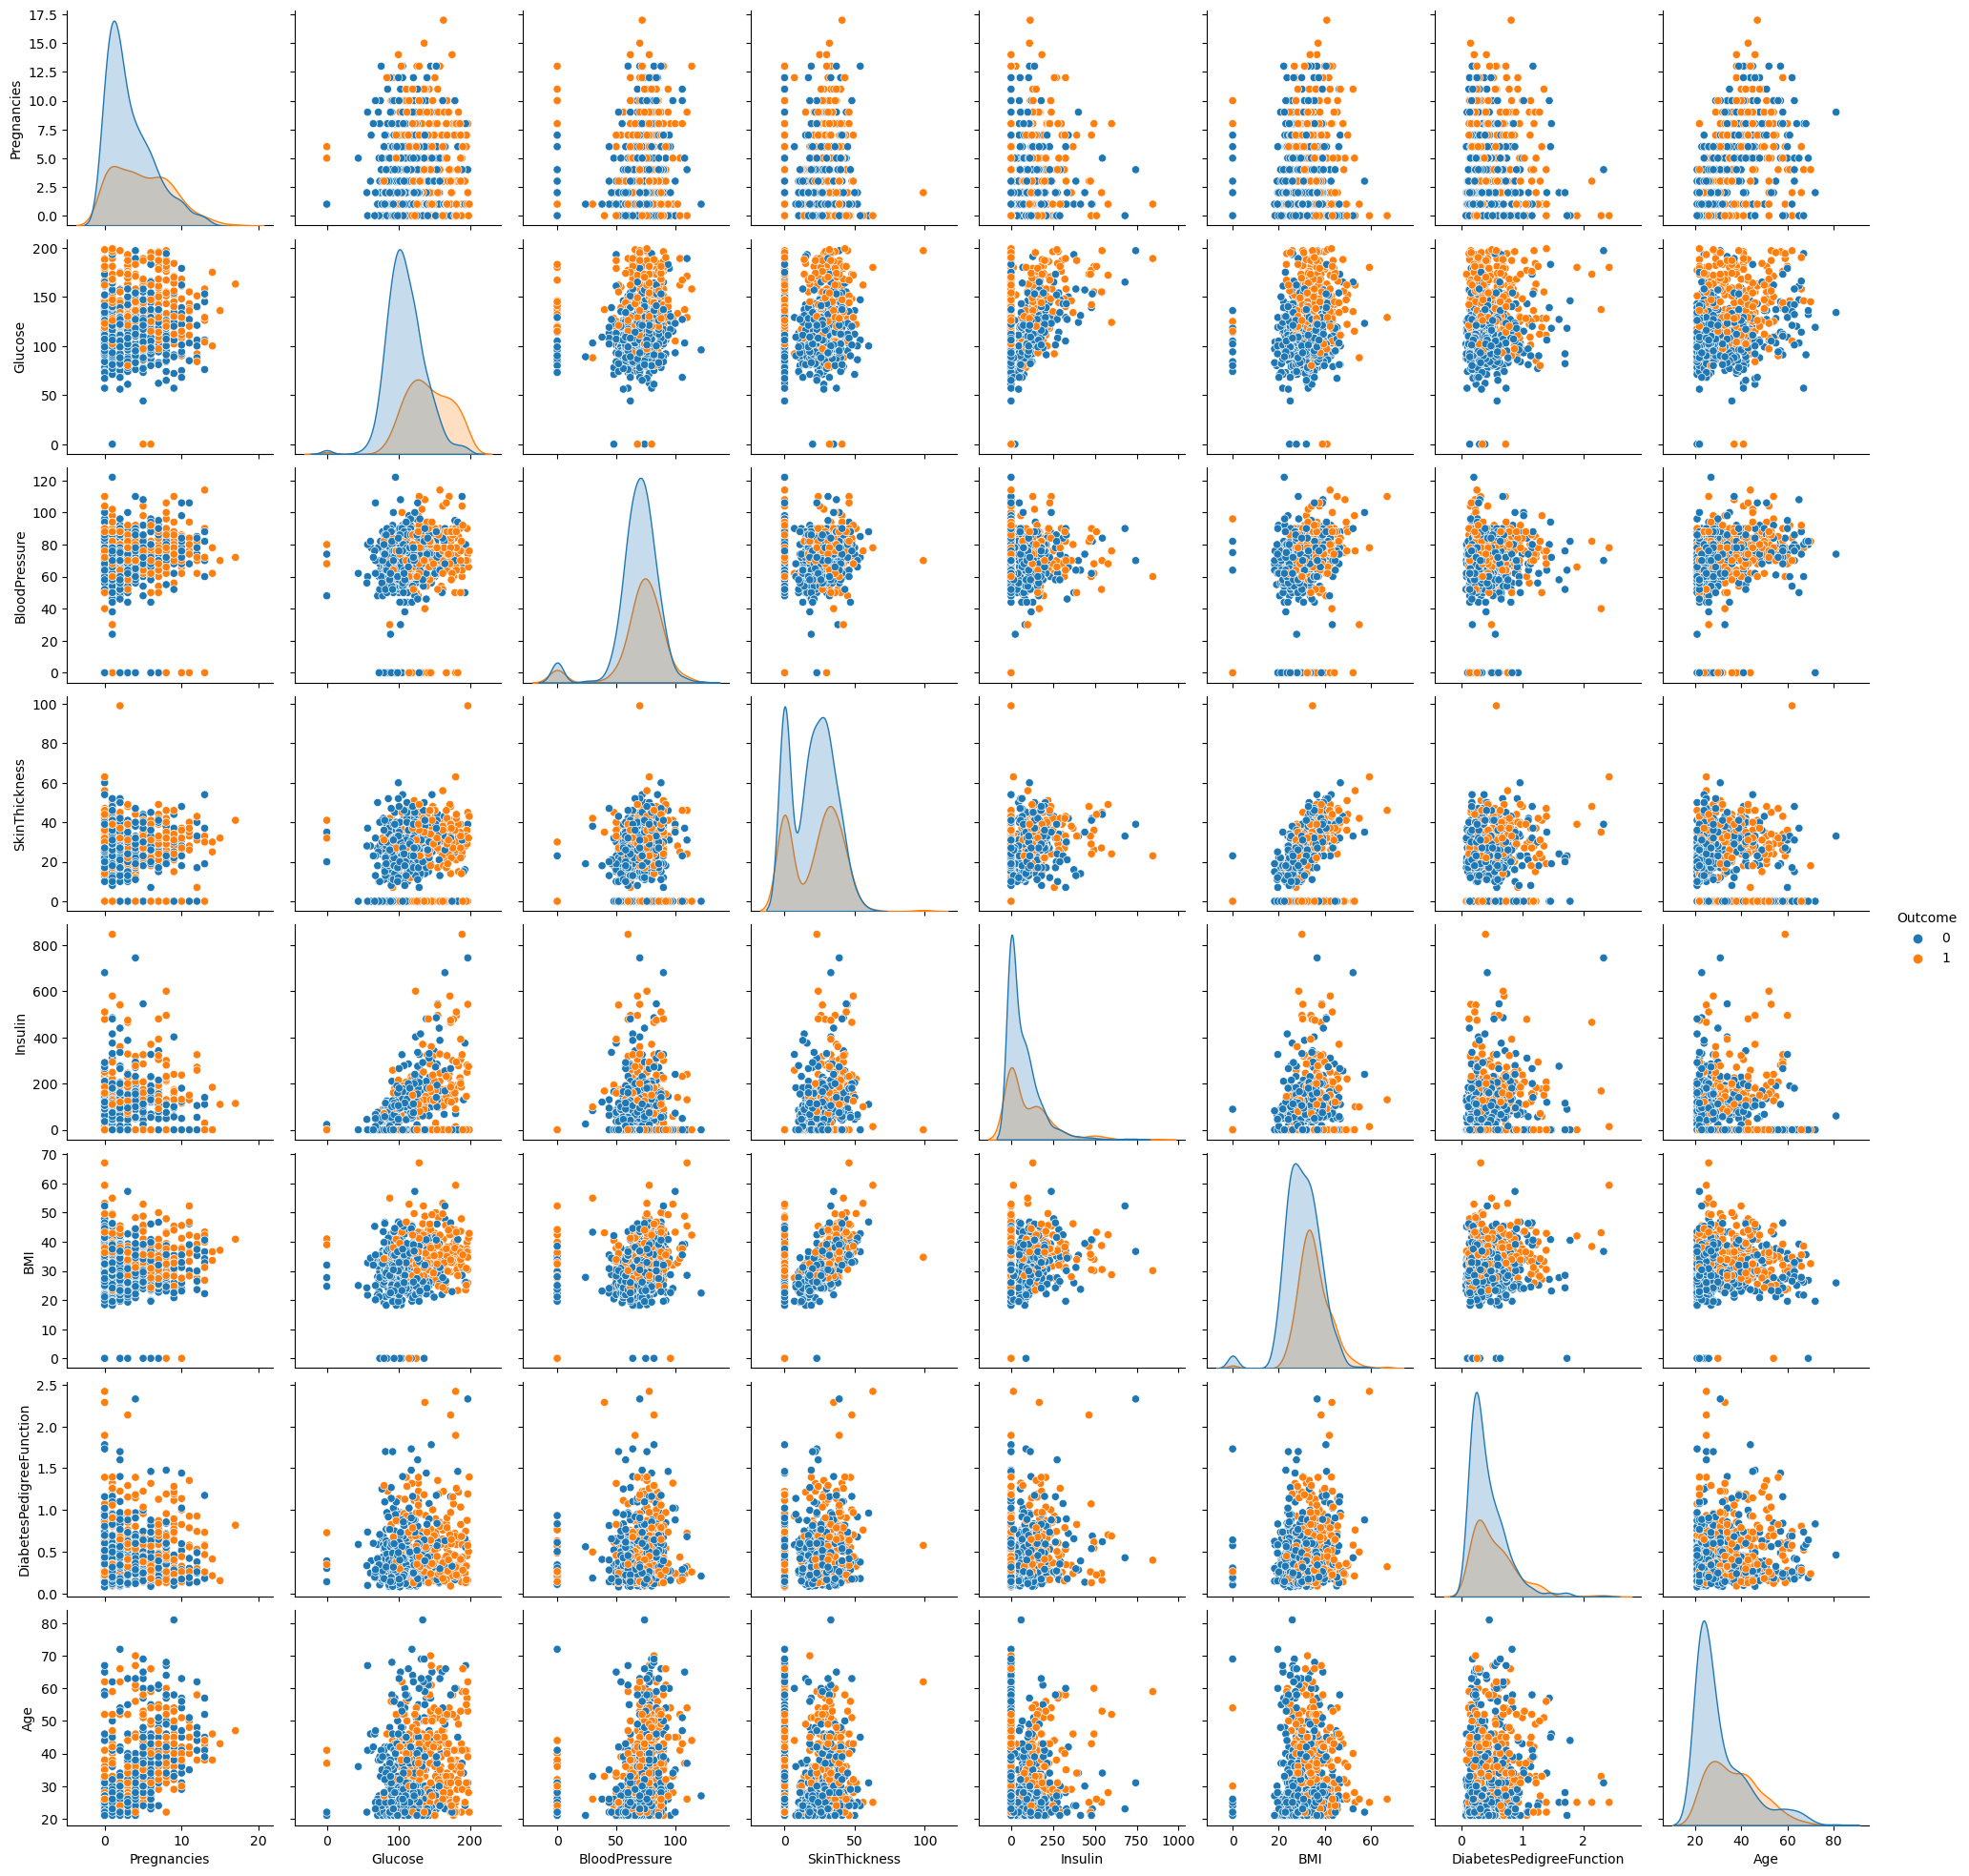

In [156]:
# Visualización de relaciones entre características
sns.pairplot(datasetDiabetes, hue='Outcome')
plt.show()

### Manejar datos con valores de 0

In [157]:
# Reemplazar los valores de 0 por NaN en las columnas específicas
columnas_con_valores_cero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
datasetDiabetes[columnas_con_valores_cero] = datasetDiabetes[columnas_con_valores_cero].replace(0, pd.NA)

# Calcular la media de las columnas para casos con Outcome = 1 (diabetes)
media_diabetes = datasetDiabetes[datasetDiabetes['Outcome'] == 1].mean()

# Calcular la media de las columnas para casos con Outcome = 0 (no diabetes)
media_no_diabetes = datasetDiabetes[datasetDiabetes['Outcome'] == 0].mean()

# Imputar los valores faltantes con la media condicional según Outcome
for columna in columnas_con_valores_cero:
    # Imputar la media de los casos con diabetes para valores faltantes
    datasetDiabetes.loc[(datasetDiabetes[columna].isnull()) & (datasetDiabetes['Outcome'] == 1), columna] = media_diabetes[columna]
    # Imputar la media de los casos sin diabetes para valores faltantes
    datasetDiabetes.loc[(datasetDiabetes[columna].isnull()) & (datasetDiabetes['Outcome'] == 0), columna] = media_no_diabetes[columna]

# Pasar todos los valores a numericos
datasetDiabetes['Glucose'] = pd.to_numeric(datasetDiabetes['Glucose'], errors='coerce')
datasetDiabetes['BloodPressure'] = pd.to_numeric(datasetDiabetes['BloodPressure'], errors='coerce')
datasetDiabetes['SkinThickness'] = pd.to_numeric(datasetDiabetes['SkinThickness'], errors='coerce')
datasetDiabetes['Insulin'] = pd.to_numeric(datasetDiabetes['Insulin'], errors='coerce')
datasetDiabetes['BMI'] = pd.to_numeric(datasetDiabetes['BMI'], errors='coerce')

### Estadísticas de datos después del cambio

In [158]:
# Seleccionar solo algunas columnas para el resumen estadístico
selected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
statistics = datasetDiabetes[selected_columns].describe()

# Imprimir el resumen estadístico
print("Valores faltantes en el conjunto de datos:")
print(statistics)

Valores faltantes en el conjunto de datos:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.697358      72.428141      29.247042  157.003527   
std       3.369578   30.462008      12.106044       8.923908   88.860914   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.000000      28.000000  130.287879   
75%       6.000000  141.000000      80.000000      33.000000  206.846154   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

             BMI  DiabetesPedigreeFunction         Age  
count  768.00000                768.000000  768.000000  
mean    32.44642                  0.471876   33.240885  
std      6.87897                  0.331329   11.760232  
min     18.20000                  0.078000  

c:\Users\kenny\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


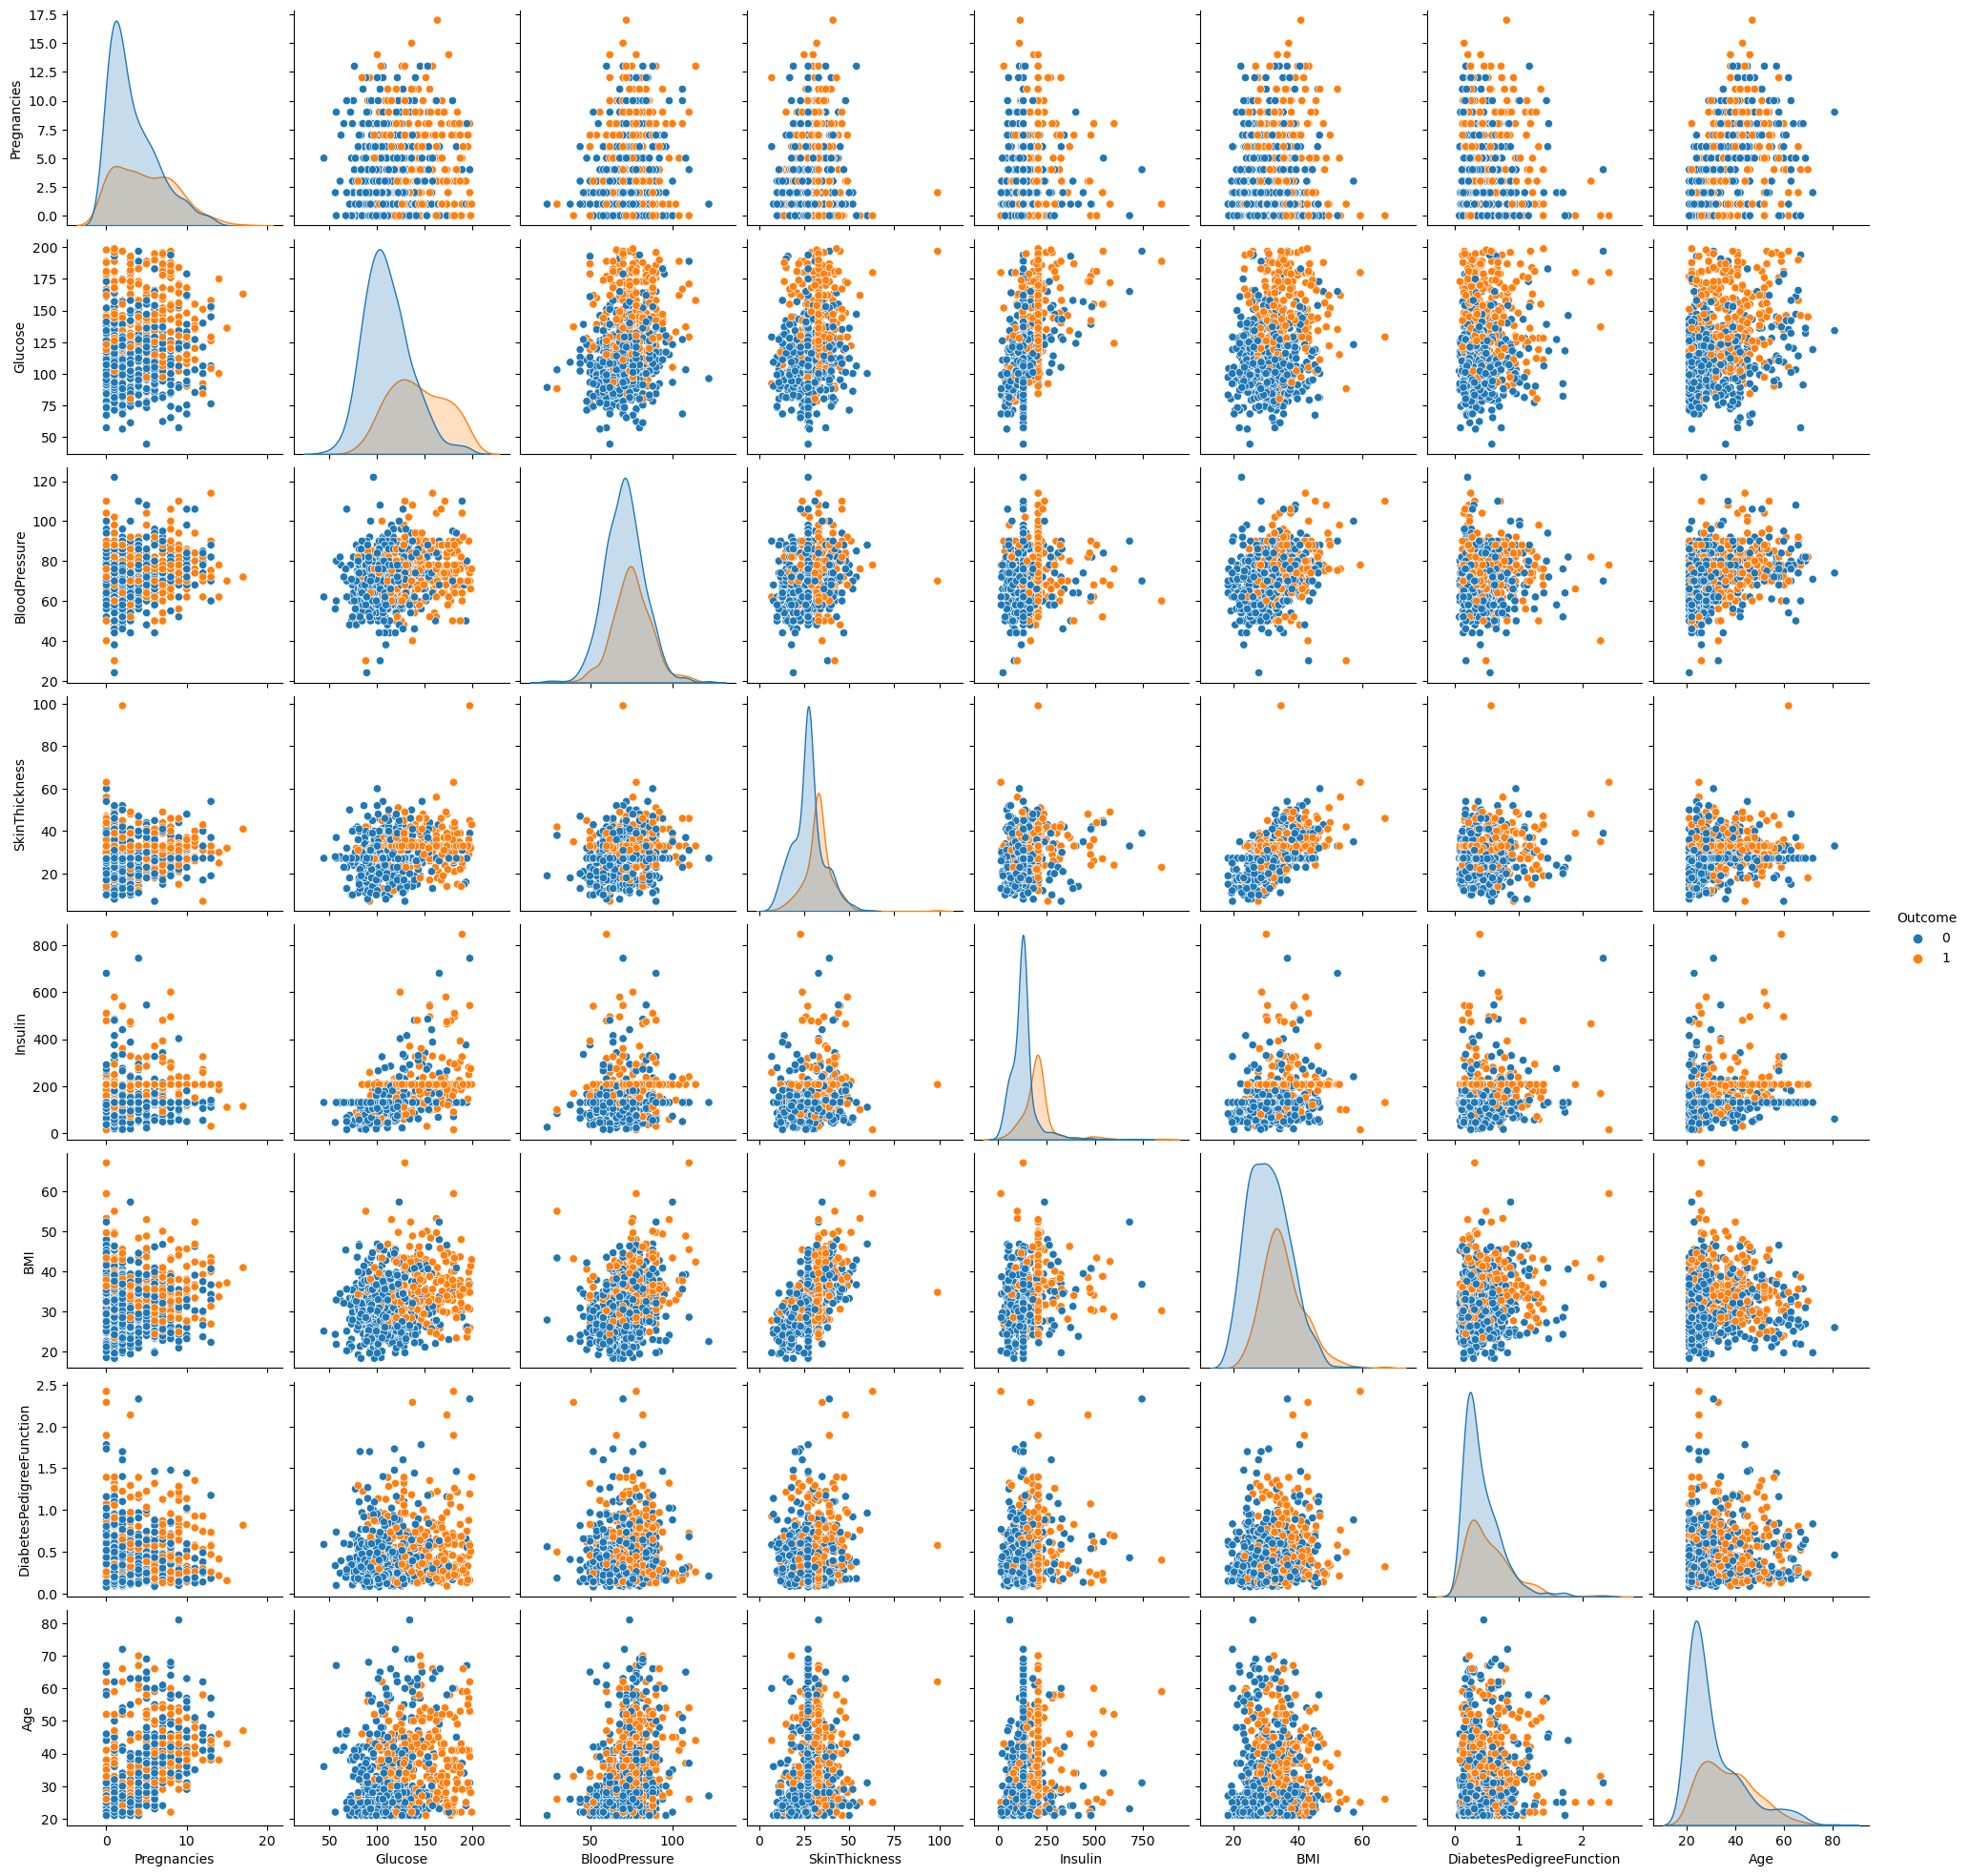

In [159]:
# Visualización de relaciones entre características
sns.pairplot(datasetDiabetes, hue='Outcome')
plt.show()

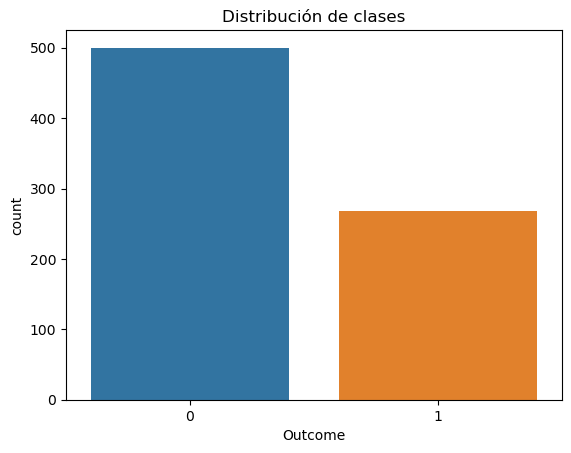

In [160]:
# Visualización de la distribución de las clases
sns.countplot(x='Outcome', data=datasetDiabetes)
plt.title('Distribución de clases')
plt.show()

### Correlación de los valores con la enfermedad

In [161]:
# Calcular la matriz de correlación
correlation_matrix = datasetDiabetes.corr()

# Seleccionar la columna de correlaciones con respecto a la variable "Outcome"
correlation_with_outcome = correlation_matrix['Outcome'].abs().sort_values(ascending=False)

# Mostrar las características con las correlaciones más altas con respecto a la variable "Outcome"
print("Características con mayor correlación con respecto a Outcome:")
print(correlation_with_outcome)

Características con mayor correlación con respecto a Outcome:
Outcome                     1.000000
Glucose                     0.495954
Insulin                     0.410918
BMI                         0.315271
SkinThickness               0.308094
Age                         0.238356
Pregnancies                 0.221898
BloodPressure               0.175087
DiabetesPedigreeFunction    0.173844
Name: Outcome, dtype: float64


### División Datos 80 - 20

In [162]:
X = datasetDiabetes.drop(columns=['Outcome'])
y = datasetDiabetes['Outcome']

# Dividir los datos en conjuntos de entrenamiento y prueba
trainingDataSetDiabetes, testingDataSetDiabetes, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de datos: Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(trainingDataSetDiabetes)
X_test_scaled = scaler.transform(testingDataSetDiabetes)

# <span style="color: #008631; font-weight: bold;">Modelos KNN, Regresión Logistica y Redes Neuronales 1er</span>

## 1) KNN 

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix


In [164]:
# Configuraciones para el modelo KNN
n_neighbors_values = [3, 5, 7, 10]  # Diferentes valores para el número de vecinos
weights_options = ['uniform', 'distance']  # Diferentes opciones para el peso de los vecinos

### Datos sin escalar

In [165]:
# Ajustar el modelo KNN con diferentes configuraciones
for n_neighbors in n_neighbors_values:
    for weights in weights_options:
        # Inicializar el clasificador KNN
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        
        # Entrenar el modelo con datos escalados
        knn.fit(trainingDataSetDiabetes, y_train)
        
        # Predecir en el conjunto de prueba
        y_pred = knn.predict(testingDataSetDiabetes)
        
        # Calcular métricas de evaluación
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Imprimir las métricas de evaluación
        print(f"Modelo KNN con {n_neighbors} vecinos y peso '{weights}':")
        print(f"   - Accuracy: {accuracy:.4f}")
        print(f"   - Precision: {precision:.4f}")
        print(f"   - Recall: {recall:.4f}")
        print(f"   - Confusion Matrix:\n{conf_matrix}\n")

Modelo KNN con 3 vecinos y peso 'uniform':
   - Accuracy: 0.8312
   - Precision: 0.7458
   - Recall: 0.8000
   - Confusion Matrix:
[[84 15]
 [11 44]]

Modelo KNN con 3 vecinos y peso 'distance':
   - Accuracy: 0.8442
   - Precision: 0.7719
   - Recall: 0.8000
   - Confusion Matrix:
[[86 13]
 [11 44]]

Modelo KNN con 5 vecinos y peso 'uniform':
   - Accuracy: 0.8377
   - Precision: 0.7778
   - Recall: 0.7636
   - Confusion Matrix:
[[87 12]
 [13 42]]

Modelo KNN con 5 vecinos y peso 'distance':
   - Accuracy: 0.8506
   - Precision: 0.8077
   - Recall: 0.7636
   - Confusion Matrix:
[[89 10]
 [13 42]]

Modelo KNN con 7 vecinos y peso 'uniform':
   - Accuracy: 0.8442
   - Precision: 0.7925
   - Recall: 0.7636
   - Confusion Matrix:
[[88 11]
 [13 42]]

Modelo KNN con 7 vecinos y peso 'distance':
   - Accuracy: 0.8506
   - Precision: 0.8077
   - Recall: 0.7636
   - Confusion Matrix:
[[89 10]
 [13 42]]

Modelo KNN con 10 vecinos y peso 'uniform':
   - Accuracy: 0.8636
   - Precision: 0.8542
  

### Datos escalados

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ajustar el modelo KNN con diferentes configuraciones
for n_neighbors in n_neighbors_values:
    for weights in weights_options:
        # Inicializar el clasificador KNN
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        
        # Entrenar el modelo con datos escalados
        knn.fit(X_train_scaled, y_train)
        
        # Predecir en el conjunto de prueba
        y_pred = knn.predict(X_test_scaled)
        
        # Calcular métricas de evaluación
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Imprimir las métricas de evaluación
        print(f"Modelo KNN con {n_neighbors} vecinos y peso '{weights}':")
        print(f"   - Accuracy: {accuracy:.4f}")
        print(f"   - Precision: {precision:.4f}")
        print(f"   - Recall: {recall:.4f}")
        print(f"   - Confusion Matrix:\n{conf_matrix}\n")

Modelo KNN con 3 vecinos y peso 'uniform':
   - Accuracy: 0.7922
   - Precision: 0.6885
   - Recall: 0.7636
   - Confusion Matrix:
[[80 19]
 [13 42]]

Modelo KNN con 3 vecinos y peso 'distance':
   - Accuracy: 0.7922
   - Precision: 0.6885
   - Recall: 0.7636
   - Confusion Matrix:
[[80 19]
 [13 42]]

Modelo KNN con 5 vecinos y peso 'uniform':
   - Accuracy: 0.8117
   - Precision: 0.7407
   - Recall: 0.7273
   - Confusion Matrix:
[[85 14]
 [15 40]]

Modelo KNN con 5 vecinos y peso 'distance':
   - Accuracy: 0.8117
   - Precision: 0.7407
   - Recall: 0.7273
   - Confusion Matrix:
[[85 14]
 [15 40]]

Modelo KNN con 7 vecinos y peso 'uniform':
   - Accuracy: 0.8247
   - Precision: 0.7593
   - Recall: 0.7455
   - Confusion Matrix:
[[86 13]
 [14 41]]

Modelo KNN con 7 vecinos y peso 'distance':
   - Accuracy: 0.8247
   - Precision: 0.7593
   - Recall: 0.7455
   - Confusion Matrix:
[[86 13]
 [14 41]]

Modelo KNN con 10 vecinos y peso 'uniform':
   - Accuracy: 0.8377
   - Precision: 0.8125
  

### Datos sin tratar los 0s

In [167]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Ajustar el modelo KNN con diferentes configuraciones
for n_neighbors in n_neighbors_values:
    for weights in weights_options:
        # Inicializar el clasificador KNN
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        
        # Entrenar el modelo con datos escalados
        knn.fit(trainingDataSetDiabetesSinModificar, y_train)
        
        # Predecir en el conjunto de prueba
        y_pred = knn.predict(testingDataSetDiabetesSinModificar)
        
        # Calcular métricas de evaluación
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Imprimir las métricas de evaluación
        print(f"Modelo KNN con {n_neighbors} vecinos y peso '{weights}':")
        print(f"   - Accuracy: {accuracy:.4f}")
        print(f"   - Precision: {precision:.4f}")
        print(f"   - Recall: {recall:.4f}")
        print(f"   - Confusion Matrix:\n{conf_matrix}\n")

Modelo KNN con 3 vecinos y peso 'uniform':
   - Accuracy: 0.6494
   - Precision: 0.5072
   - Recall: 0.6364
   - Confusion Matrix:
[[65 34]
 [20 35]]

Modelo KNN con 3 vecinos y peso 'distance':
   - Accuracy: 0.6623
   - Precision: 0.5224
   - Recall: 0.6364
   - Confusion Matrix:
[[67 32]
 [20 35]]

Modelo KNN con 5 vecinos y peso 'uniform':
   - Accuracy: 0.6623
   - Precision: 0.5246
   - Recall: 0.5818
   - Confusion Matrix:
[[70 29]
 [23 32]]

Modelo KNN con 5 vecinos y peso 'distance':
   - Accuracy: 0.6688
   - Precision: 0.5333
   - Recall: 0.5818
   - Confusion Matrix:
[[71 28]
 [23 32]]

Modelo KNN con 7 vecinos y peso 'uniform':
   - Accuracy: 0.6883
   - Precision: 0.5574
   - Recall: 0.6182
   - Confusion Matrix:
[[72 27]
 [21 34]]

Modelo KNN con 7 vecinos y peso 'distance':
   - Accuracy: 0.6818
   - Precision: 0.5517
   - Recall: 0.5818
   - Confusion Matrix:
[[73 26]
 [23 32]]

Modelo KNN con 10 vecinos y peso 'uniform':
   - Accuracy: 0.7662
   - Precision: 0.7111
  

## 2) Regresión Logistica

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [169]:
class RegresionLogistica:
    def  __init__(self, trainingDataSet, testingDataSet, y_train, y_test):
        self.trainingDataSet = trainingDataSet
        self.testingDataSet = testingDataSet
        self.y_train = y_train
        self.y_test = y_test
    
    def escalarDatos(self):
        scaler = StandardScaler()
        self.trainingDataSet = scaler.fit_transform(self.trainingDataSet)
        self.testingDataSet = scaler.transform(self.testingDataSet)

    def calcular(self):
        # Inicializar el modelo de regresión logística
        modelo_logistico = LogisticRegression()

        # Ajustar el modelo al conjunto de entrenamiento
        modelo_logistico.fit(self.trainingDataSet, self.y_train)

        # Predecir en el conjunto de prueba
        y_pred = modelo_logistico.predict(self.testingDataSet)

        # Evaluar el rendimiento del modelo
        accuracy = accuracy_score(self.y_test, y_pred)
        informe_clasificacion = classification_report(self.y_test, y_pred)
        recall = recall_score(self.y_test, y_pred)
        precision = precision_score(self.y_test, y_pred)
        conf_matrix = confusion_matrix(self.y_test, y_pred)

        # Imprimir resultados
        print(f'Accuracy del modelo: {accuracy:.2f}')
        print(f'Recall del modelo: {recall:.2f}')
        print(f'Precision del modelo: {precision:.2f}')
        print('\nInforme de clasificación:')
        print(informe_clasificacion)
        print(recall)
        print("Confusion Matrix:")
        print(conf_matrix)
    
    def calcularEpochs(self):
        # Define the logistic regression model
        model = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(self.trainingDataSet.shape[1],)),
            tf.keras.layers.Dense(1, activation='sigmoid')
        ])

        # Compile the model with additional metrics
        model.compile(optimizer='adam', 
                    loss='binary_crossentropy', 
                    metrics=['accuracy', 'precision', 'recall'])

        # Create a callback to track the metrics
        class LossHistory(tf.keras.callbacks.Callback):
            def on_epoch_end(self, epoch, logs=None):
                # Updated to print precision and recall
                print(f" Epoch {epoch + 1}, Loss: {logs['loss']}, Accuracy: {logs['accuracy']}, Precision: {logs['precision']}, Recall: {logs['recall']}")

        # Fit the model with the LossHistory callback
        history_callback = LossHistory()
        model.fit(self.trainingDataSet, self.y_train, epochs=200, batch_size=32, callbacks=[history_callback])

        # Evaluate the model
        loss, accuracy, precision, recall = model.evaluate(self.testingDataSet, self.y_test)
        print(f'Model Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
    
        # Make predictions
        y_pred = (model.predict(self.testingDataSet) > 0.5).astype("int32")
        informe_clasificacion = classification_report(self.y_test, y_pred)
        print('\nClassification Report:')
        print(informe_clasificacion)

In [170]:
modeloDiabetes = RegresionLogistica(trainingDataSetDiabetes, testingDataSetDiabetes, y_train, y_test)
modeloDiabetes.escalarDatos()
modeloDiabetes.calcular()

Accuracy del modelo: 0.80
Recall del modelo: 0.67
Precision del modelo: 0.74

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85        99
           1       0.74      0.67      0.70        55

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.78       154
weighted avg       0.80      0.80      0.80       154

0.6727272727272727
Confusion Matrix:
[[86 13]
 [18 37]]


In [171]:
modeloDiabetes.calcularEpochs()

Epoch 1/200
 1/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.6562 - loss: 0.6748 - precision: 0.5294 - recall: 0.7500 Epoch 1, Loss: 0.6144275665283203, Accuracy: 0.7459283471107483, Precision: 0.608364999294281, Recall: 0.751173734664917
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7484 - loss: 0.5607 - precision: 0.6108 - recall: 0.7459
Epoch 2/200
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6250 - loss: 0.7428 - precision: 0.3000 - recall: 0.3750 Epoch 2, Loss: 0.5839409232139587, Accuracy: 0.7524430155754089, Precision: 0.6177605986595154, Recall: 0.751173734664917
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7485 - loss: 0.5728 - precision: 0.6052 - recall: 0.7213 
Epoch 3/200
 1/20 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6875 - loss: 0.8109 - precision: 0.4615 - recall: 0.6667 Epoch 3, Loss: 0.5629870891571045, Accuracy: 0.757328987121582, Precision: 0.625, Recall: 0.751173734664917
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7574 - 

### Datos sin tratar los 0s

In [172]:
modeloDiabetes = RegresionLogistica(trainingDataSetDiabetesSinModificar, testingDataSetDiabetesSinModificar, y_train, y_test)
modeloDiabetes.escalarDatos()
modeloDiabetes.calcular()

Accuracy del modelo: 0.75
Recall del modelo: 0.67
Precision del modelo: 0.65

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

0.6727272727272727
Confusion Matrix:
[[79 20]
 [18 37]]


## 3) Redes Neuronales

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Librerías de sckit-learn para Modelo Supervisado de Redes Neuronales 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [174]:
class NeuralNewrok:
    def  __init__(self, trainingDataSet, testingDataSet, y_train, y_test):
        self.trainingDataSet = trainingDataSet
        self.testingDataSet = testingDataSet
        self.y_train = y_train
        self.y_test = y_test
        self.alpha_val = 0.1
        self.learning_rates = [0.1, 0.01, 0.001, 0.0001]

    def scale(self):
        scaler = StandardScaler()
        self.X_train_scaled = scaler.fit_transform(self.trainingDataSet)
        self.X_test_scaled = scaler.transform(self.testingDataSet)

    def train(self):
        self.mlp = MLPClassifier(
        random_state=42, 
        max_iter=200, 
        learning_rate='adaptive', 
        learning_rate_init=0.01, 
        hidden_layer_sizes=(100,),
        # Parámetros adicionales para experimentar
        # alpha=self.alpha_val,  # 1. Regularización
        # early_stopping=True,  # 2. Early Stopping
        # validation_fraction=0.1,  # Parte de 2. Early Stopping
        # n_iter_no_change=10,  # Parte de 2. Early Stopping
        # solver='adam'  # 3. Optimizador. Cambia a 'sgd' o 'lbfgs' para experimentar.
        )
        self.mlp.fit(self.X_train_scaled, self.y_train)
    
    def compare_learning_rates(self):
        for lr in self.learning_rates:
            model = MLPClassifier(random_state=42, max_iter=200, learning_rate='adaptive', learning_rate_init=lr, hidden_layer_sizes=(100,))
            model.fit(self.X_train_scaled, self.y_train)

            #Calculando accuracy en el conjunto de entrenamiento
            train_accuracy = model.score(self.X_train_scaled, self.y_train)
            # Calculando accuracy en el conjunto de prueba
            test_accuracy = model.score(self.X_test_scaled, self.y_test)
            train_precision = precision_score(self.y_train, model.predict(self.X_train_scaled))
            test_precision = precision_score(self.y_test, model.predict(self.X_test_scaled))
            train_recall = recall_score(self.y_train, model.predict(self.X_train_scaled))
            test_recall = recall_score(self.y_test, model.predict(self.X_test_scaled))


            print(f"Learning Rate: {lr}")
            print(f"Accuracy en entrenamiento: {train_accuracy:.2f}")
            print(f"Accuracy en prueba: {test_accuracy:.2f}")
            print(f"Presicion en entrenamiento: {train_precision:.2f}")
            print(f"Presicion en prueba: {test_precision:.2f}")
            print(f"Recall en entrenamiento: {train_recall:.2f}")
            print(f"Recall en prueba: {test_recall:.2f}")
            print("-" * 50)


    def predict(self):
        self.y_pred = self.mlp.predict(self.X_test_scaled)
        # Evaluación del modelo
        accuracy = accuracy_score(self.y_test, self.y_pred)
        precision = precision_score(self.y_test, self.y_pred)
        recall = recall_score(self.y_test, self.y_pred)
        f1 = f1_score(self.y_test, self.y_pred)
        conf_matrix = confusion_matrix(self.y_test, self.y_pred)

        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)
        print("Confusion Matrix:")
        print(conf_matrix)

    def run(self):
        self.scale()
        self.compare_learning_rates()
        self.train()
        self.predict()

In [175]:
NeuralNetwork = NeuralNewrok(trainingDataSetDiabetes, testingDataSetDiabetes, y_train, y_test)
NeuralNetwork.scale()
NeuralNetwork.run() 


Learning Rate: 0.1
Accuracy en entrenamiento: 0.88
Accuracy en prueba: 0.82
Presicion en entrenamiento: 0.79
Presicion en prueba: 0.73
Recall en entrenamiento: 0.88
Recall en prueba: 0.82
--------------------------------------------------
Learning Rate: 0.01
Accuracy en entrenamiento: 0.93
Accuracy en prueba: 0.80
Presicion en entrenamiento: 0.87
Presicion en prueba: 0.70
Recall en entrenamiento: 0.94
Recall en prueba: 0.76
--------------------------------------------------


c:\Users\kenny\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001
Accuracy en entrenamiento: 0.87
Accuracy en prueba: 0.82
Presicion en entrenamiento: 0.84
Presicion en prueba: 0.73
Recall en entrenamiento: 0.79
Recall en prueba: 0.82
--------------------------------------------------


c:\Users\kenny\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.0001
Accuracy en entrenamiento: 0.81
Accuracy en prueba: 0.79
Presicion en entrenamiento: 0.79
Presicion en prueba: 0.72
Recall en entrenamiento: 0.62
Recall en prueba: 0.65
--------------------------------------------------
Accuracy: 0.7987012987012987
Precision: 0.7
Recall: 0.7636363636363637
F1-score: 0.7304347826086957
Confusion Matrix:
[[81 18]
 [13 42]]


### Datos sin tratar los 0s

In [176]:
NeuralNetwork = NeuralNewrok(trainingDataSetDiabetesSinModificar, testingDataSetDiabetesSinModificar, y_train, y_test)
NeuralNetwork.scale()
NeuralNetwork.run() 

Learning Rate: 0.1
Accuracy en entrenamiento: 0.81
Accuracy en prueba: 0.78
Presicion en entrenamiento: 0.69
Presicion en prueba: 0.67
Recall en entrenamiento: 0.82
Recall en prueba: 0.75
--------------------------------------------------
Learning Rate: 0.01
Accuracy en entrenamiento: 0.90
Accuracy en prueba: 0.69
Presicion en entrenamiento: 0.86
Presicion en prueba: 0.56
Recall en entrenamiento: 0.83
Recall en prueba: 0.58
--------------------------------------------------


c:\Users\kenny\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001
Accuracy en entrenamiento: 0.82
Accuracy en prueba: 0.76
Presicion en entrenamiento: 0.78
Presicion en prueba: 0.67
Recall en entrenamiento: 0.67
Recall en prueba: 0.65
--------------------------------------------------


c:\Users\kenny\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.0001
Accuracy en entrenamiento: 0.75
Accuracy en prueba: 0.74
Presicion en entrenamiento: 0.72
Presicion en prueba: 0.66
Recall en entrenamiento: 0.46
Recall en prueba: 0.56
--------------------------------------------------
Accuracy: 0.6883116883116883
Precision: 0.5614035087719298
Recall: 0.5818181818181818
F1-score: 0.5714285714285714
Confusion Matrix:
[[74 25]
 [23 32]]


# <span style="color: #b30000; font-weight: bold;">Análisis Segundo DataSet - Wine</span>

In [177]:
datasetWineQuality  = pd.read_csv("./wine.csv")
# Mostrar el nuevo conjunto de datos con solo columnas numéricas
datasetWineQuality

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol quality  
0         9.4     bad  
1         9.8     bad  
2         9.8     bad  
3         9.8    good  
4         9.4     bad  
...       ...     ...  
1594     10.5     bad  
1595     11.2    good  
1596     11.0    good  
1597     10.2     bad  
1598     11.0    good  

[1599 rows x 12 columns]

### Pasar a binario 0 - 1 

In [178]:
datasetWineQuality['quality'] = datasetWineQuality['quality'].replace('bad', 0)
datasetWineQuality['quality'] = datasetWineQuality['quality'].replace('good', 1)
datasetWineQuality

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
4                    11.0                  34.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1596                 29.0                  40.0  0.99574  3.42       0.75   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        0  
1         9.8        0  
2         9.8        0  
3         9.8        1  
4         9.4        0  
...       ...      ...  
1594     10.5        0  
1595     11.2        1  
1596     11.0        1  
1597     10.2        0  
1598     11.0        1  

[1599 rows x 12 columns]

### Estadísticas de los datos

In [179]:
# Obtener estadísticas descriptivas para todas las columnas
statistics = datasetWineQuality.describe(include='all')

print("Estadisticas de los valores:")
print(statistics)

Estadisticas de los valores:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000 

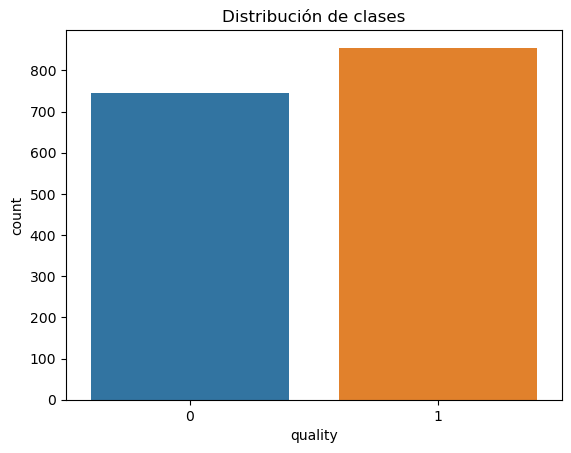

In [180]:
# Visualización de la distribución de las clases
sns.countplot(x='quality', data=datasetWineQuality)
plt.title('Distribución de clases')
plt.show()

In [181]:
# Calcular la matriz de correlación
correlation_matrix = datasetWineQuality.corr()

# Seleccionar las correlaciones de las características con respecto a la calidad del vino
correlation_with_quality = correlation_matrix['quality'].abs().sort_values(ascending=False)

# Mostrar las características con las correlaciones más altas con respecto a la calidad del vino
print("Características con mayor correlación con la calidad del vino:")
print(correlation_with_quality)

Características con mayor correlación con la calidad del vino:
quality                 1.000000
alcohol                 0.434751
volatile acidity        0.321441
total sulfur dioxide    0.231963
sulphates               0.218072
citric acid             0.159129
density                 0.159110
chlorides               0.109494
fixed acidity           0.095093
free sulfur dioxide     0.061757
pH                      0.003264
residual sugar          0.002160
Name: quality, dtype: float64


## División de datos 80 - 20

In [182]:
X = datasetWineQuality.drop(columns=["residual sugar","pH","free sulfur dioxide","fixed acidity",  "quality"]) 
y = datasetWineQuality['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
trainingDatasetWineQuality, testingDatasetWineQuality, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocesamiento de datos: Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(trainingDatasetWineQuality)
X_test_scaled = scaler.transform(testingDatasetWineQuality)

# <span style="color: #008631; font-weight: bold;">Modelos KNN, Regresión Logistica y Redes Neuronales 2do DataSet</span>

## 1) KNN

In [183]:
# Configuraciones para el modelo KNN
n_neighbors_values = [3, 5, 7, 10]  # Diferentes valores para el número de vecinos
weights_options = ['uniform', 'distance']  # Diferentes opciones para el peso de los vecinos

### Datos sin escalado

In [184]:
# Ajustar el modelo KNN con diferentes configuraciones
for n_neighbors in n_neighbors_values:
    for weights in weights_options:
        # Inicializar el clasificador KNN
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        
        # Entrenar el modelo con datos escalados
        knn.fit(trainingDatasetWineQuality, y_train)
        
        # Predecir en el conjunto de prueba
        y_pred = knn.predict(testingDatasetWineQuality)
        
        # Calcular métricas de evaluación
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Imprimir las métricas de evaluación
        print(f"Modelo KNN con {n_neighbors} vecinos y peso '{weights}':")
        print(f"   - Accuracy: {accuracy:.4f}")
        print(f"   - Precision: {precision:.4f}")
        print(f"   - Recall: {recall:.4f}")
        print(f"   - Confusion Matrix:\n{conf_matrix}\n")

Modelo KNN con 3 vecinos y peso 'uniform':
   - Accuracy: 0.6875
   - Precision: 0.7310
   - Recall: 0.6983
   - Confusion Matrix:
[[ 95  46]
 [ 54 125]]

Modelo KNN con 3 vecinos y peso 'distance':
   - Accuracy: 0.7281
   - Precision: 0.7584
   - Recall: 0.7542
   - Confusion Matrix:
[[ 98  43]
 [ 44 135]]

Modelo KNN con 5 vecinos y peso 'uniform':
   - Accuracy: 0.6750
   - Precision: 0.7143
   - Recall: 0.6983
   - Confusion Matrix:
[[ 91  50]
 [ 54 125]]

Modelo KNN con 5 vecinos y peso 'distance':
   - Accuracy: 0.7156
   - Precision: 0.7418
   - Recall: 0.7542
   - Confusion Matrix:
[[ 94  47]
 [ 44 135]]



Modelo KNN con 7 vecinos y peso 'uniform':
   - Accuracy: 0.6625
   - Precision: 0.7178
   - Recall: 0.6536
   - Confusion Matrix:
[[ 95  46]
 [ 62 117]]

Modelo KNN con 7 vecinos y peso 'distance':
   - Accuracy: 0.7219
   - Precision: 0.7528
   - Recall: 0.7486
   - Confusion Matrix:
[[ 97  44]
 [ 45 134]]

Modelo KNN con 10 vecinos y peso 'uniform':
   - Accuracy: 0.6625
   - Precision: 0.7351
   - Recall: 0.6201
   - Confusion Matrix:
[[101  40]
 [ 68 111]]

Modelo KNN con 10 vecinos y peso 'distance':
   - Accuracy: 0.7250
   - Precision: 0.7514
   - Recall: 0.7598
   - Confusion Matrix:
[[ 96  45]
 [ 43 136]]



### Datos con escalado

In [185]:
# Ajustar el modelo KNN con diferentes configuraciones
for n_neighbors in n_neighbors_values:
    for weights in weights_options:
        # Inicializar el clasificador KNN
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        
        # Entrenar el modelo con datos escalados
        knn.fit(X_train_scaled, y_train)
        
        # Predecir en el conjunto de prueba
        y_pred = knn.predict(X_test_scaled)
        
        # Calcular métricas de evaluación
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        # Imprimir las métricas de evaluación
        print(f"Modelo KNN con {n_neighbors} vecinos y peso '{weights}':")
        print(f"   - Accuracy: {accuracy:.4f}")
        print(f"   - Precision: {precision:.4f}")
        print(f"   - Recall: {recall:.4f}")
        print(f"   - Confusion Matrix:\n{conf_matrix}\n")

Modelo KNN con 3 vecinos y peso 'uniform':
   - Accuracy: 0.7438
   - Precision: 0.7513
   - Recall: 0.8101
   - Confusion Matrix:
[[ 93  48]
 [ 34 145]]

Modelo KNN con 3 vecinos y peso 'distance':
   - Accuracy: 0.7937
   - Precision: 0.7927
   - Recall: 0.8547
   - Confusion Matrix:
[[101  40]
 [ 26 153]]

Modelo KNN con 5 vecinos y peso 'uniform':
   - Accuracy: 0.7500
   - Precision: 0.7647
   - Recall: 0.7989
   - Confusion Matrix:
[[ 97  44]
 [ 36 143]]

Modelo KNN con 5 vecinos y peso 'distance':
   - Accuracy: 0.8031
   - Precision: 0.8118
   - Recall: 0.8436
   - Confusion Matrix:
[[106  35]
 [ 28 151]]

Modelo KNN con 7 vecinos y peso 'uniform':
   - Accuracy: 0.7312
   - Precision: 0.7435
   - Recall: 0.7933
   - Confusion Matrix:
[[ 92  49]
 [ 37 142]]

Modelo KNN con 7 vecinos y peso 'distance':
   - Accuracy: 0.8063
   - Precision: 0.8031
   - Recall: 0.8659
   - Confusion Matrix:
[[103  38]
 [ 24 155]]

Modelo KNN con 10 vecinos y peso 'uniform':
   - Accuracy: 0.7531
 

## 2) Regresion logistica

In [186]:
modeloWine = RegresionLogistica(trainingDatasetWineQuality, testingDatasetWineQuality, y_train, y_test)
modeloWine.escalarDatos()
modeloWine.calcular()

Accuracy del modelo: 0.73
Recall del modelo: 0.72
Precision del modelo: 0.79

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       141
           1       0.79      0.72      0.75       179

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.73      0.73       320

0.7150837988826816
Confusion Matrix:
[[106  35]
 [ 51 128]]


In [187]:
modeloWine.calcularEpochs()

Epoch 1/200
27/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3332 - loss: 0.9233 - precision: 0.3954 - recall: 0.4523 Epoch 1, Loss: 0.9115951657295227, Accuracy: 0.3346364200115204, Precision: 0.38591915369033813, Recall: 0.4378698170185089
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3338 - loss: 0.9215 - precision: 0.3939 - recall: 0.4474
Epoch 2/200
37/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3535 - loss: 0.8858 - precision: 0.4030 - recall: 0.4667  Epoch 2, Loss: 0.8720257878303528, Accuracy: 0.3534010946750641, Precision: 0.40308088064193726, Recall: 0.46449702978134155
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3534 - loss: 0.8845 - precision: 0.4029 - recall: 0.4662
Epoch 3/200
 1/40 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4375 - loss: 0.8874 - precision: 0.5238 - recall: 0.5789 Epoch 3, Loss: 0.8367183804512024, Accuracy: 0.37451133131980896, Precision: 0.42269325256347656, Recall: 0.5014792680740356
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

## 3) Redes Neuronales

In [188]:
NeuralNetworkWine = NeuralNewrok(trainingDatasetWineQuality, testingDatasetWineQuality, y_train, y_test)
NeuralNetworkWine.scale()
NeuralNetworkWine.run()

Learning Rate: 0.1
Accuracy en entrenamiento: 0.82
Accuracy en prueba: 0.75
Presicion en entrenamiento: 0.85
Presicion en prueba: 0.78
Recall en entrenamiento: 0.82
Recall en prueba: 0.77
--------------------------------------------------


c:\Users\kenny\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.01
Accuracy en entrenamiento: 0.87
Accuracy en prueba: 0.74
Presicion en entrenamiento: 0.83
Presicion en prueba: 0.74
Recall en entrenamiento: 0.94
Recall en prueba: 0.82
--------------------------------------------------


c:\Users\kenny\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001
Accuracy en entrenamiento: 0.78
Accuracy en prueba: 0.73
Presicion en entrenamiento: 0.80
Presicion en prueba: 0.77
Recall en entrenamiento: 0.79
Recall en prueba: 0.75
--------------------------------------------------


c:\Users\kenny\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.0001
Accuracy en entrenamiento: 0.75
Accuracy en prueba: 0.73
Presicion en entrenamiento: 0.77
Presicion en prueba: 0.78
Recall en entrenamiento: 0.75
Recall en prueba: 0.73
--------------------------------------------------
Accuracy: 0.7375
Precision: 0.7386934673366834
Recall: 0.8212290502793296
F1-score: 0.7777777777777778
Confusion Matrix:
[[ 89  52]
 [ 32 147]]


c:\Users\kenny\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [189]:
NeuralNetworkWine.compare_learning_rates()

Learning Rate: 0.1
Accuracy en entrenamiento: 0.82
Accuracy en prueba: 0.75
Presicion en entrenamiento: 0.85
Presicion en prueba: 0.78
Recall en entrenamiento: 0.82
Recall en prueba: 0.77
--------------------------------------------------


c:\Users\kenny\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.01
Accuracy en entrenamiento: 0.87
Accuracy en prueba: 0.74
Presicion en entrenamiento: 0.83
Presicion en prueba: 0.74
Recall en entrenamiento: 0.94
Recall en prueba: 0.82
--------------------------------------------------


c:\Users\kenny\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Learning Rate: 0.001
Accuracy en entrenamiento: 0.78
Accuracy en prueba: 0.73
Presicion en entrenamiento: 0.80
Presicion en prueba: 0.77
Recall en entrenamiento: 0.79
Recall en prueba: 0.75
--------------------------------------------------
Learning Rate: 0.0001
Accuracy en entrenamiento: 0.75
Accuracy en prueba: 0.73
Presicion en entrenamiento: 0.77
Presicion en prueba: 0.78
Recall en entrenamiento: 0.75
Recall en prueba: 0.73
--------------------------------------------------


c:\Users\kenny\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
